# Prepare Data

In [6]:
import os
from pathlib import Path

from arcgis.learn import prepare_data, SingleShotDetector

In [18]:
data = Path(os.path.abspath(r'../data'))
data_int = data/'interim'
chip_dir = data_int/'pro_training_data'

model_dir = Path(os.path.abspath(r'../models'))

Build a [Fast.AI ImageDataBunch](https://docs.fast.ai/vision.data.html#ImageDataBunch), a DataBunch, Fast.AI's operational data structure, suitable for computer vision.

In [4]:
data = prepare_data(str(chip_dir), {1: '   Pad'})
data

ImageDataBunch;

Train: LabelList
y: SSDObjectCategoryList (231 items)
[ImageBBox (448, 448), ImageBBox (448, 448), ImageBBox (448, 448), ImageBBox (448, 448), ImageBBox (448, 448)]...
Path: D:\projects\oil-pad\data\interim\pro_training_data\images
x: SSDObjectItemList (231 items)
[Image (3, 448, 448), Image (3, 448, 448), Image (3, 448, 448), Image (3, 448, 448), Image (3, 448, 448)]...
Path: D:\projects\oil-pad\data\interim\pro_training_data\images;

Valid: LabelList
y: SSDObjectCategoryList (25 items)
[ImageBBox (448, 448), ImageBBox (448, 448), ImageBBox (448, 448), ImageBBox (448, 448), ImageBBox (448, 448)]...
Path: D:\projects\oil-pad\data\interim\pro_training_data\images
x: SSDObjectItemList (25 items)
[Image (3, 448, 448), Image (3, 448, 448), Image (3, 448, 448), Image (3, 448, 448), Image (3, 448, 448)]...
Path: D:\projects\oil-pad\data\interim\pro_training_data\images;

Test: None

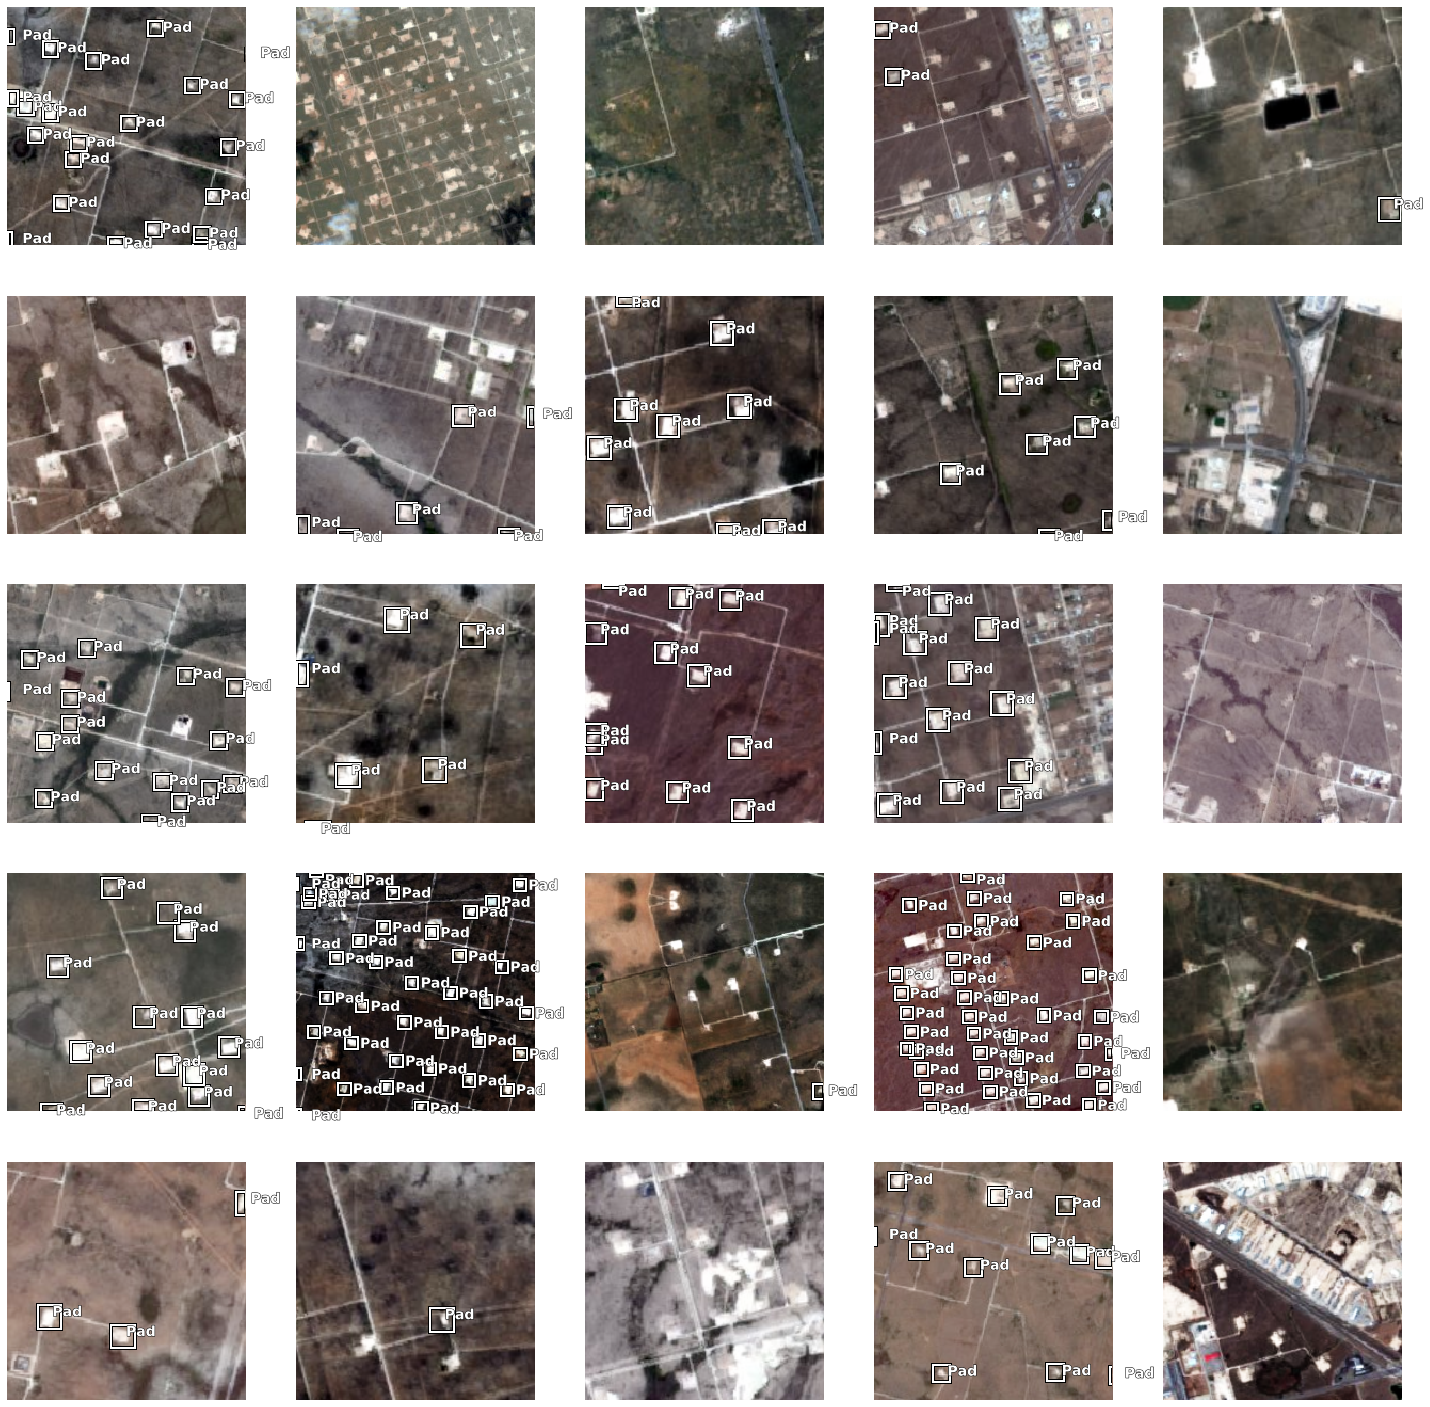

In [5]:
data.show_batch()

# Build Model

[arcgis.learn.SingleShotDetector](https://developers.arcgis.com/python/api-reference/arcgis.learn.html#singleshotdetector), based on the [Fast.AI MOOC Lession 9](https://course.fast.ai/videos/?lesson=9).

In [8]:
ssd = SingleShotDetector(data, grids=[9], zooms=[1.0], ratios=[[1.0, 1.0]])
ssd

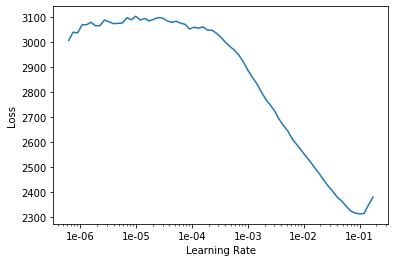

In [9]:
ssd.lr_find()

In [10]:
ssd.fit(10, slice(0.001, 0.02))

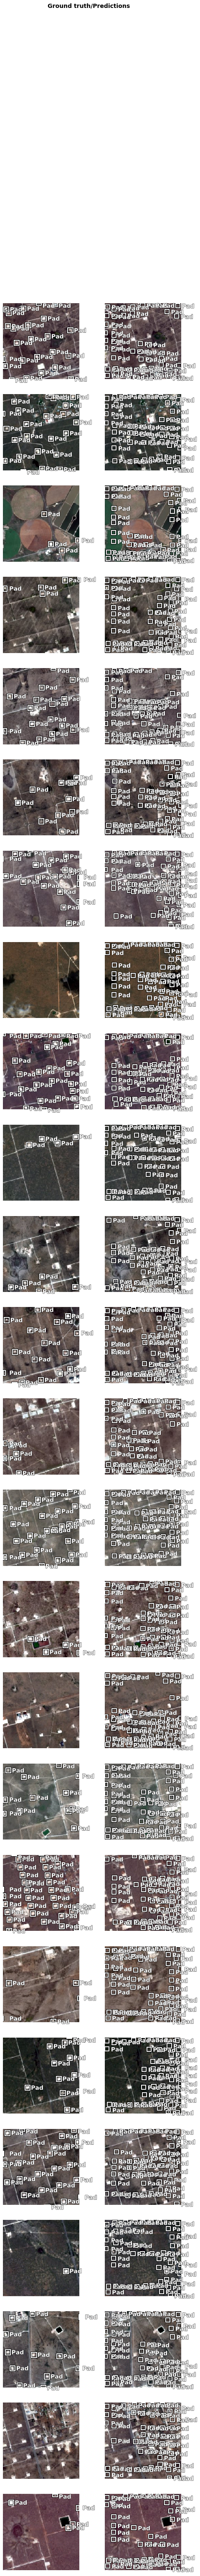

In [11]:
ssd.show_results(rows=25, thresh=0.05)

In [20]:
ssd.save(str(model_dir/'oil_pad_ssd_01'))

WindowsPath('D:/projects/oil-pad/models/oil_pad_ssd_01')